In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_selection import SelectKBest
%matplotlib inline
import matplotlib.pyplot as plt
import shap
import seaborn as sns

In [2]:
data = pd.read_csv('water potability data-Copy1.csv')
data.head()

,region_area_,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,region_area_1,3.716080,180.196811,18630.362669,6.330435,NaN,602.990359,15.285013,56.444076,4.500656,0
1,region_area_100,4.270716,217.611599,24405.555346,7.086700,297.951852,359.623910,13.583526,54.589840,3.763906,0
2,region_area_1000,6.648849,232.462013,30733.808648,5.656462,344.670335,267.809179,17.863444,35.411181,4.827527,0
3,region_area_1001,NaN,261.753637,21174.713291,7.314074,NaN,582.848407,15.215849,90.367455,4.217553,0
4,region_area_1002,9.323584,263.484560,15751.480111,5.196259,297.593625,409.878704,10.727265,74.669285,3.006650,0


In [3]:
data.isnull().sum()

region_area_         0
ph                 336
Hardness             0
Solids               0
Chloramines          0
Sulfate            547
Conductivity         0
Organic_carbon       0
Trihalomethanes    111
Turbidity            0
Potability           0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260 entries, 0 to 2259
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   region_area_     2260 non-null   object 
 1   ph               1924 non-null   float64
 2   Hardness         2260 non-null   float64
 3   Solids           2260 non-null   float64
 4   Chloramines      2260 non-null   float64
 5   Sulfate          1713 non-null   float64
 6   Conductivity     2260 non-null   float64
 7   Organic_carbon   2260 non-null   float64
 8   Trihalomethanes  2149 non-null   float64
 9   Turbidity        2260 non-null   float64
 10  Potability       2260 non-null   int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 194.3+ KB


In [5]:
data.fillna(data['ph'].mode()[0],inplace = True)
data.fillna(data['Sulfate'].mode()[0],inplace = True)
data.fillna(data['Trihalomethanes'].mode()[0],inplace = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260 entries, 0 to 2259
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   region_area_     2260 non-null   object 
 1   ph               2260 non-null   float64
 2   Hardness         2260 non-null   float64
 3   Solids           2260 non-null   float64
 4   Chloramines      2260 non-null   float64
 5   Sulfate          2260 non-null   float64
 6   Conductivity     2260 non-null   float64
 7   Organic_carbon   2260 non-null   float64
 8   Trihalomethanes  2260 non-null   float64
 9   Turbidity        2260 non-null   float64
 10  Potability       2260 non-null   int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 194.3+ KB


In [7]:
data = data.drop(columns = 'region_area_' , axis =1 )
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,3.716080,180.196811,18630.362669,6.330435,0.000000,602.990359,15.285013,56.444076,4.500656,0
1,4.270716,217.611599,24405.555346,7.086700,297.951852,359.623910,13.583526,54.589840,3.763906,0
2,6.648849,232.462013,30733.808648,5.656462,344.670335,267.809179,17.863444,35.411181,4.827527,0
3,0.000000,261.753637,21174.713291,7.314074,0.000000,582.848407,15.215849,90.367455,4.217553,0
4,9.323584,263.484560,15751.480111,5.196259,297.593625,409.878704,10.727265,74.669285,3.006650,0


In [8]:
data.astype(int)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,3,180,18630,6,0,602,15,56,4,0
1,4,217,24405,7,297,359,13,54,3,0
2,6,232,30733,5,344,267,17,35,4,0
3,0,261,21174,7,0,582,15,90,4,0
4,9,263,15751,5,297,409,10,74,3,0
...,...,...,...,...,...,...,...,...,...,...
2255,8,281,13533,7,314,537,18,58,4,0
2256,6,245,20919,5,0,393,9,41,4,0
2257,6,217,24293,6,333,400,16,87,3,0
2258,6,282,26757,8,0,432,16,73,4,0


In [9]:
data['Potability'].value_counts()

0    1382
1     878
Name: Potability, dtype: int64

In [10]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2260.000000,2260.000000,2260.000000,2260.000000,2260.000000,2260.000000,2260.000000,2260.000000,2260.000000,2260.000000
mean,6.030429,247.000935,22100.926521,6.802715,253.615724,436.572437,14.359075,63.176919,3.969176,0.388496
std,2.919358,33.162065,8829.474740,1.592352,147.982731,80.645313,3.298100,21.437043,0.777228,0.487516
min,0.000000,124.266124,321.247422,0.047189,0.000000,211.724737,4.476899,0.000000,1.450000,0.000000
25%,5.279300,226.799112,15761.393491,5.800652,229.843193,376.894507,12.154291,53.926506,3.444178,0.000000
50%,6.758754,247.379235,21149.453853,6.828266,318.832122,432.813965,14.325645,65.451727,3.962502,0.000000
75%,7.876045,267.798367,27347.271380,7.802569,351.084910,492.076858,16.625857,76.827376,4.502519,1.000000
max,13.541240,373.897891,61227.500818,12.822189,481.775755,718.331364,28.405000,124.115000,6.739000,1.000000


In [11]:
x = data.drop(columns = 'Potability', axis = 1)
y = data.iloc[:,-1]

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='Solids'>

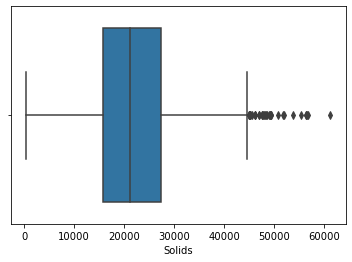

In [12]:
sns.boxplot(data['Solids'])

In [13]:
q1 = data['Solids'].quantile(0.25)
q3 = data['Solids'].quantile(0.75)
lqr = q3 - q1
lqr

11585.877889590238

In [14]:
ll = q1 - (1.5 * lqr)
ul = q3 + (1.5 * lqr) 
data['Solids'] = np.where(data['Solids'] > ul,ul,data['Solids'])

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='Solids'>

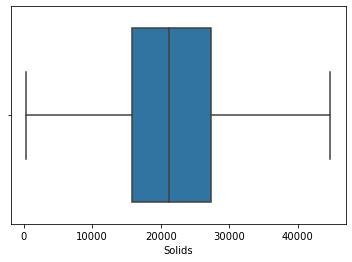

In [15]:
sns.boxplot(data['Solids'])

In [16]:
# sc = StandardScaler()
# x = sc.fit_transform(x)

In [17]:
from imblearn.over_sampling import SMOTE

In [57]:
sampler = SMOTE(sampling_strategy=0.9,random_state=5)
x_sampled,y_sampled = sampler.fit_resample(x,y)

In [58]:
y_sampled.value_counts()

0    1382
1    1243
Name: Potability, dtype: int64

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x_sampled,y_sampled,test_size= 0.3,random_state= 56)
y_test.shape

(788,)

## Using RandomForest

In [60]:
model = RandomForestClassifier(n_estimators= 50,random_state=50,n_jobs=5,class_weight='balanced')

In [61]:
model.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=50, n_jobs=5,
                       random_state=50)

In [62]:
model.score(x_test,y_test)

0.6725888324873096

In [63]:
model.score(x_train,y_train)

1.0

In [64]:
y_pred = model.predict(x_test)

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.80      0.72       414
           1       0.71      0.53      0.61       374

    accuracy                           0.67       788
   macro avg       0.68      0.67      0.66       788
weighted avg       0.68      0.67      0.67       788



## Using AdaBoost 

In [66]:
model2 = AdaBoostClassifier(random_state=8,n_estimators=700, learning_rate=0.05)

In [67]:
model2.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.05, n_estimators=700, random_state=8)

In [68]:
model2.score(x_test,y_test)

0.5558375634517766

In [69]:
model2.score(x_train,y_train)

0.6488840500816548

In [70]:
y_pred = model2.predict(x_test)

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.62      0.60       414
           1       0.54      0.48      0.51       374

    accuracy                           0.56       788
   macro avg       0.55      0.55      0.55       788
weighted avg       0.55      0.56      0.55       788



## using DecisionTree Model

In [72]:
model3 = DecisionTreeClassifier(max_depth=6,random_state= 9,class_weight='balanced')

In [73]:
model3.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, random_state=9)

In [74]:
model3.score(x_test,y_test)

0.5761421319796954

In [75]:
model3.score(x_train,y_train)

0.6608600979858464

In [76]:
y_pred = model3.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.71      0.64       414
           1       0.57      0.43      0.49       374

    accuracy                           0.58       788
   macro avg       0.58      0.57      0.56       788
weighted avg       0.58      0.58      0.57       788



In [77]:
pram = {'max_depth': [5,6,8,9,10],
        'min_samples_leaf':np.arange(2,6),
        'max_features': ['auto', 'sqrt','log2']}

In [78]:
grid = GridSearchCV(estimator = model, param_grid= pram, n_jobs= -1,verbose=5, cv=9)

In [79]:
grid.fit(x_train,y_train)

Fitting 9 folds for each of 60 candidates, totalling 540 fits


GridSearchCV(cv=9,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_estimators=50, n_jobs=5,
                                              random_state=50),
             n_jobs=-1,
             param_grid={'max_depth': [5, 6, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': array([2, 3, 4, 5])},
             verbose=5)

In [80]:
grid.score(x_test,y_test)

0.6370558375634517

In [81]:
grid.score(x_train,y_train)

0.9292324442025041

In [82]:
y_pred = grid.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67       414
           1       0.63      0.57      0.60       374

    accuracy                           0.64       788
   macro avg       0.64      0.63      0.63       788
weighted avg       0.64      0.64      0.64       788



## Using Voting Classifier

In [83]:
vc = VotingClassifier([('model1',model),('model2',model2),('model3',model3)])

In [84]:
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('model1',
                              RandomForestClassifier(class_weight='balanced',
                                                     n_estimators=50, n_jobs=5,
                                                     random_state=50)),
                             ('model2',
                              AdaBoostClassifier(learning_rate=0.05,
                                                 n_estimators=700,
                                                 random_state=8)),
                             ('model3',
                              DecisionTreeClassifier(class_weight='balanced',
                                                     max_depth=6,
                                                     random_state=9))])

In [85]:
vc.score(x_test,y_test)

0.6294416243654822

In [47]:
vc.score(x_train,y_train)

0.7725060827250608

In [48]:
y_pred = vc.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.91      0.75       414
           1       0.67      0.27      0.39       291

    accuracy                           0.64       705
   macro avg       0.65      0.59      0.57       705
weighted avg       0.65      0.64      0.60       705



## Explainable AI on RandomForest


In [87]:
explainer = shap.TreeExplainer(model3)

In [88]:
base_value = explainer.expected_value
base_value

array([0.5, 0.5])

In [89]:
shap_value = explainer.shap_values(x_test)

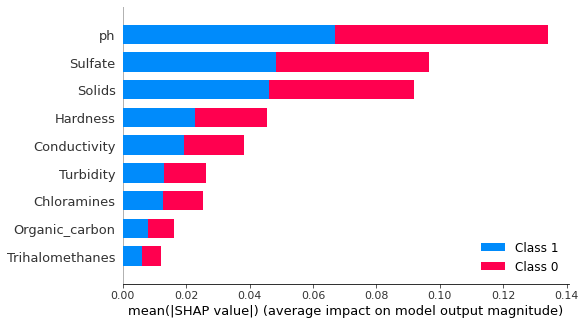

In [90]:
shap.summary_plot(shap_value, x_test)

## Explaining DecisionTree Model 

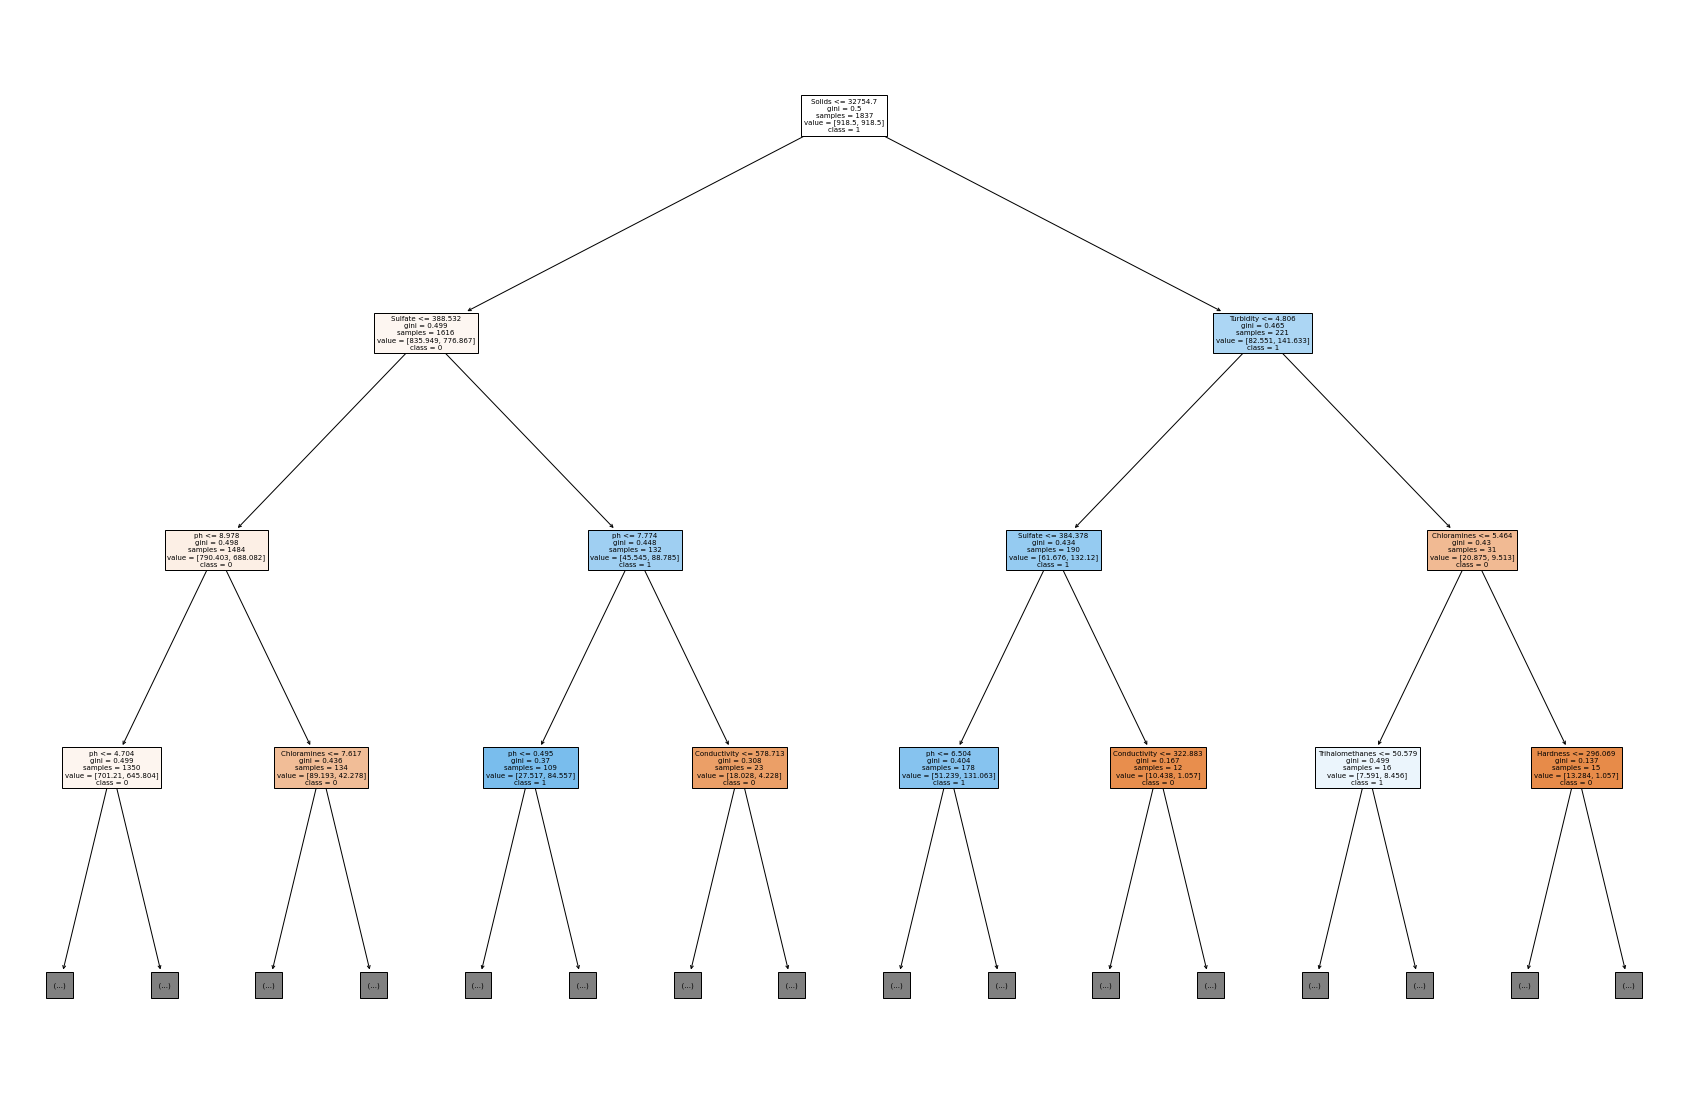

In [91]:
fig = plt.figure(figsize = (30,20))
_ = plot_tree(model3,feature_names = x.columns,class_names = ['0','1'],filled = True,max_depth = 3)